# Pandas

<!--<badge>--><a href="https://colab.research.google.com/github/TheAIDojo/Machine_Learning_Bootcamp/blob/main/Week 02 - Data Science Libraries/2- Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><!--</badge>-->


One of the downsides of NumPy is that it is difficult to work with data that is heterogenous (that is, of mixed data types). Such data is very common, however. Pandas (https://pandas.pydata.org/) is a Python library makes working with such data significantly easier. Similar to NumPy, Pandas is often used to work with tabular data. The two primary data structures are the [Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html) (one-dimensional arrays) and the [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame) (two-dimensional arrays, which can be thought of as dictionaries of Series). 

More details on Pandas can be found in the following tutorials. 

* [Quick Start](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html)
* [Cookbook](https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html#cookbook)
* [Cheatsheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)


### Series

Series are one-dimensional arrays in elements have indexes (essentially labels). They can be created in  a number of ways, including from a Python dictionary. If no indexes are provided when defined, then integer indexes 0, 1, 2, ..., are used. Series can also be given names. 

In [ ]:
import pandas as pd
import numpy as np


series1 = pd.Series([10, 20, 30, 10])  # no indexes or name specified
series2 = pd.Series(
    [1, 2, 3, 4.0, 5], index=["first", "second", "third", "fourth", "fifth"], name="s2"
)
series3 = pd.Series({3: "a", "d": 0, "7": 8}, name="s3")  # from a dictionary.
series4 = pd.Series(42, range(10), name="s4")  # from a scalar, with indexes.

print(series1)
print("-" * 40)

print(series2)
print("-" * 40)

print(series1[2])
print("-" * 40)

print(series3)
print("-" * 40)

print(series4)

0    10
1    20
2    30
3    10
dtype: int64
----------------------------------------
first     1.0
second    2.0
third     3.0
fourth    4.0
fifth     5.0
Name: s2, dtype: float64
----------------------------------------
30
----------------------------------------
3    a
d    0
7    8
Name: s3, dtype: object
----------------------------------------
0    42
1    42
2    42
3    42
4    42
5    42
6    42
7    42
8    42
9    42
Name: s4, dtype: int64


You can examine a series using several builtin properties and methods. 

In [ ]:
print(series2.size)
print(series2.shape)
print(series2.dtype)
print(series2.index)

5
(5,)
float64
Index(['first', 'second', 'third', 'fourth', 'fifth'], dtype='object')


## Accessing Elements and  Slicing

Series work much like NumPy ndarrays and can be sliced. 

In [ ]:
series = pd.Series({"a": 1, "b": 2, "c": 3})

series["a"] = 10
print(series)

a    10
b     2
c     3
dtype: int64


In [ ]:
series = pd.Series(range(100, 1000, 25), index=list(range(100, 136)), name="s")
series[100]  # note we're referencing by label

100

In [ ]:
series[[102, 101, 100, 109]]  # note we're referencing by label

102    150
101    125
100    100
109    325
Name: s, dtype: int64

In [ ]:
series[10:15]  # note we're referencing by position

110    350
111    375
112    400
113    425
114    450
Name: s, dtype: int64

In [ ]:
series[series > 800]  # slicing using a boolean condition

129    825
130    850
131    875
132    900
133    925
134    950
135    975
Name: s, dtype: int64

In [ ]:
series > 800  # The condition itself returns a new series.

100    False
101    False
102    False
103    False
104    False
105    False
106    False
107    False
108    False
109    False
110    False
111    False
112    False
113    False
114    False
115    False
116    False
117    False
118    False
119    False
120    False
121    False
122    False
123    False
124    False
125    False
126    False
127    False
128    False
129     True
130     True
131     True
132     True
133     True
134     True
135     True
Name: s, dtype: bool

In [ ]:
series.mean()

537.5

In [ ]:
series[series < series.mean()]

100    100
101    125
102    150
103    175
104    200
105    225
106    250
107    275
108    300
109    325
110    350
111    375
112    400
113    425
114    450
115    475
116    500
117    525
Name: s, dtype: int64

In [ ]:
series == 150

100    False
101    False
102     True
103    False
104    False
105    False
106    False
107    False
108    False
109    False
110    False
111    False
112    False
113    False
114    False
115    False
116    False
117    False
118    False
119    False
120    False
121    False
122    False
123    False
124    False
125    False
126    False
127    False
128    False
129    False
130    False
131    False
132    False
133    False
134    False
135    False
Name: s, dtype: bool

## DataFrames

DataFrame objects can be viewed as two-dimensional arrays--rows and columns in which the columns may be of different data types. You can create a DataFrame in one of several ways. One way is simply to pass a tabular structure of data (a nested list, or a NumPy ndarray). 

In [ ]:
df = pd.DataFrame([[1, 2, 3], [4, 5, 6]])
df

,0,1,2
0,1,2,3
1,4,5,6


You can specify labels for the indexes and columns.

In [ ]:
ar = np.array([[1, 2, 3], [4, 5, 6], [20, 5, 1]])
df = pd.DataFrame(ar, columns=["a", "b", "c"], index=["row1", "row2", "row3"])
df.query("b==5")

,a,b,c
row2,4,5,6
row3,20,5,1


You can also create a DataFrame from a dictionary of Series. 

In [ ]:
s1 = pd.Series([1, 4], index=["row1", "row2"])
s2 = pd.Series([2, 5], index=["row1", "row2"])
s3 = pd.Series([3, 6], index=["row1", "row2"])
df = pd.DataFrame({"a": s1, "b": s2, "c": s3})
df

,a,b,c
row1,1,2,3
row2,4,5,6


DataFrames can also be created from a list of dictionaries.

In [ ]:
df = pd.DataFrame([{"a": 1, "b": 2, "c": 3}, {"a": 4, "b": 5, "c": 6}])
df.index = ["row1", "row2"]
df

,a,b,c
row1,1,2,3
row2,4,5,6


## Accessing, inserting, deleting, and manipulating columns

Once created, you can refer to columns of data using the column name.

In [ ]:
df["a"]

row1    1
row2    4
Name: a, dtype: int64

In [ ]:
df[["a", "c"]]

,a,c
row1,1,3
row2,4,6


In [ ]:
print(df.columns)
print(df.index)

Index(['a', 'b', 'c'], dtype='object')
Index(['row1', 'row2'], dtype='object')


In [ ]:
df["d"] = df["c"] + 1
df

,a,b,c,d
row1,1,2,3,4
row2,4,5,6,7


In [ ]:
df = df * 2
df

,a,b,c,d
row1,2,4,6,8
row2,8,10,12,14


In [ ]:
df["c"] = pd.Series({"row1": 6.5})
df

,a,b,c,d
row1,2,4,6.5,8
row2,8,10,NaN,14


In [ ]:
df = df.drop(["c"], axis=1)
df

,a,b,d
row1,2,4,8
row2,8,10,14


Note the datatype of the following: 

In [ ]:
type(df["a"])

pandas.core.series.Series

In [ ]:
type(df[["a", "b"]])

pandas.core.frame.DataFrame

## Accessing rows/indexes

In [ ]:
df = pd.DataFrame(
    [{"a": 1, "b": 2, "c": 3}, {"a": 4, "b": 5, "c": 6}, {"a": 9, "b": 8, "c": 9}]
)
df.index = ["row1", "row2", "row3"]
df

,a,b,c
row1,1,2,3
row2,4,5,6
row3,9,8,9


In [ ]:
df.loc["row2"]  # by index label

a    4
b    5
c    6
Name: row2, dtype: int64

In [ ]:
df.iloc[1]  # by index position

a    4
b    5
c    6
Name: row2, dtype: int64

In [ ]:
df[1:]

,a,b,c
row2,4,5,6
row3,9,8,9


In [ ]:
df.iloc[1:]

,a,b,c
row2,4,5,6
row3,9,8,9


## Basic Operations on DataFrames

In [ ]:
df1 = pd.DataFrame(
    [[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]], index=["x", "y"], columns=list("abcde")
)
df1

,a,b,c,d,e
x,1,2,3,4,5
y,6,7,8,9,10


In [ ]:
df2 = pd.DataFrame(
    [[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]], index=["x", "y"], columns=list("abcde")
)
df2 = 1 - df2 % 2
print(df2)
df2 = df2 == 1
df2

   a  b  c  d  e
x  0  1  0  1  0
y  1  0  1  0  1


,a,b,c,d,e
x,False,True,False,True,False
y,True,False,True,False,True


In [ ]:
df3 = df1 > 4
df3

,a,b,c,d,e
x,False,False,False,False,True
y,True,True,True,True,True


In [ ]:
df4 = df2 & df3
df4

,a,b,c,d,e
x,False,False,False,False,False
y,True,False,True,False,True


## Basic Statistics and other information

In [ ]:
df1 = pd.DataFrame(
    [[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]],
    index=["x", "y"],
    columns=["a", "b", "c", "d", "e"],
)
df1

,a,b,c,d,e
x,1,2,3,4,5
y,6,7,8,9,10


In [ ]:
df1.mean(axis=0)  # takes mean for each column

a    3.5
b    4.5
c    5.5
d    6.5
e    7.5
dtype: float64

In [ ]:
df1.mean(axis=1)  # takes mean for each row

x    3.0
y    8.0
dtype: float64

In [ ]:
df1.describe()  # Generate descriptive statistics.

,a,b,c,d,e
count,2.000000,2.000000,2.000000,2.000000,2.000000
mean,3.500000,4.500000,5.500000,6.500000,7.500000
std,3.535534,3.535534,3.535534,3.535534,3.535534
min,1.000000,2.000000,3.000000,4.000000,5.000000
25%,2.250000,3.250000,4.250000,5.250000,6.250000
50%,3.500000,4.500000,5.500000,6.500000,7.500000
75%,4.750000,5.750000,6.750000,7.750000,8.750000
max,6.000000,7.000000,8.000000,9.000000,10.000000


In [ ]:
# we can create DataFrames from Numpy Arrays

numpy_array = np.arange(1000).reshape(
    (500, 2)
)  # create numpy array with shape (500 ,2 ) start from 0 to 1000

df2 = pd.DataFrame(numpy_array, columns=["a", "b"])
df2.head()  # get the first 5 rows from the datframe

,a,b
0,0,1
1,2,3
2,4,5
3,6,7
4,8,9


In [ ]:
df2.tail()  # get the last 5 rows from the dataframe

,a,b
495,990,991
496,992,993
497,994,995
498,996,997
499,998,999


## *Reading and Writing CSV files*

Reading in csv files is generally fairly easy in Pandas, but there are many options. See [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) and [to_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html)

In [ ]:
df2.to_csv("test.csv", header=True, index=False)

In [ ]:
df3 = pd.read_csv("test.csv", header=0)
df3

,a,b
0,0,1
1,2,3
2,4,5
3,6,7
4,8,9
...,...,...
495,990,991
496,992,993
497,994,995
498,996,997


In [ ]:
df3 = pd.read_csv("test.csv", header=0, index_col=0)
df3

,b
a,
0,1
2,3
4,5
6,7
8,9
...,...
990,991
992,993
994,995


# Plotting in Pandas

It is possible to create figures and charts by invoking methods directly on Pandas objects. 

<AxesSubplot:>

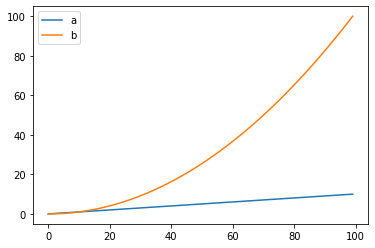

In [ ]:
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 100)
y = x**2
df = pd.DataFrame(np.array([x, y]).T, columns=["a", "b"])

df.plot()

<AxesSubplot:>

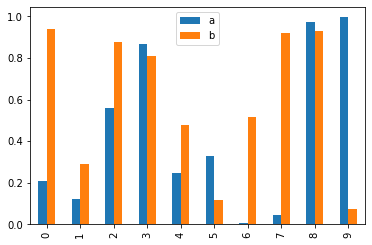

In [ ]:
x = np.random.rand(10)
y = np.random.rand(10)
df = pd.DataFrame(np.array([x, y]).T, columns=["a", "b"])
df.plot.bar()

<AxesSubplot:ylabel='Frequency'>

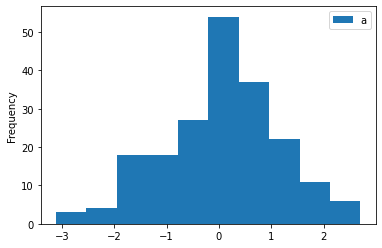

In [ ]:
x = np.random.randn(200)
df = pd.DataFrame(x, columns=["a"])
df.plot.hist()

# Missing data with pandas 


Pandas treat None and NaN as essentially interchangeable for indicating missing or null values. To facilitate this convention, there are several useful functions for detecting, removing, and replacing null values in Pandas DataFrame :

isnull()

notnull()

dropna()

fillna()

replace()


In [ ]:
# Dictionary of lists
data = {
    "First Score": [100, 90, np.nan, 95],
    "Second Score": [30, 45, 56, np.nan],
    "Third Score": [np.nan, 40, 80, 98],
}

# Creating a dataframe from list
df = pd.DataFrame(data)

# Using isnull() function
df.isnull()

,First Score,Second Score,Third Score
0,False,False,True
1,False,False,False
2,True,False,False
3,False,True,False


In [ ]:
data = {
    "First Score": [100, 90, np.nan, 95],
    "Second Score": [30, 45, 56, np.nan],
    "Third Score": [np.nan, 40, 80, 98],
}

# creating a dataframe using dictionary
df = pd.DataFrame(data)

# using notnull() function
df.notnull()

,First Score,Second Score,Third Score
0,True,True,False
1,True,True,True
2,False,True,True
3,True,False,True


In [ ]:
data = {
    "First Score": [100, 90, np.nan, 95],
    "Second Score": [30, 45, 56, np.nan],
    "Third Score": [np.nan, 40, 80, 98],
}

# creating a dataframe from dictionary
df = pd.DataFrame(data)

# filling missing value using fillna()
df.fillna(0, inplace=True)
df

,First Score,Second Score,Third Score
0,100.0,30.0,0.0
1,90.0,45.0,40.0
2,0.0,56.0,80.0
3,95.0,0.0,98.0


In [ ]:
data = {
    "First_Score": [100, 90, 80, 95],
    "Second_Score": [30, 45, 56, 35],
    "Third_Score": [np.nan, 40, 80, 98],
}

# creating a dataframe from dictionary
df = pd.DataFrame(data)

# filling missing value using fillna()
df.Third_Score.fillna(int(df.Third_Score.mean()), inplace=True)
df

,First_Score,Second_Score,Third_Score
0,100,30,72.0
1,90,45,40.0
2,80,56,80.0
3,95,35,98.0


In [ ]:
data = {
    "First_Score": [100, 90, 80, 95],
    "Second_Score": [30, 45, 56, 35],
    "Third_Score": [np.nan, 40, 80, 98],
}

# creating a dataframe from dictionary
df = pd.DataFrame(data)

# filling missing value using replace()
df.replace(to_replace=np.nan, value=-99, inplace=True)
df

,First_Score,Second_Score,Third_Score
0,100,30,-99.0
1,90,45,40.0
2,80,56,80.0
3,95,35,98.0
